In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Agriculture_Manual_Daily_Labour_Wage_In_India_2010_2019.csv')

In [3]:
df.head()

,Centre,Gender,Labour Category,Labour Type,State,District,Wage(INR),Month,Year
0,BUKKAPATINAM,M,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,216.0,Jul,2015
1,BUKKAPATINAM,W,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,150.0,Jul,2015
2,BUKKAPATINAM,M,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
3,BUKKAPATINAM,W,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
4,BUKKAPATINAM,M,SKILLED \nLABOUR,CARPENTER,ANDHRA PRADESH,ANANTAPUR,300.0,Jul,2015


In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}  # Dictionary to store LabelEncoder objects
label_mappings = {}  # Dictionary to store mappings

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the LabelEncoder
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Drop rows with missing 'Wage(INR)' values
data_encoded = df.dropna(subset=['Wage(INR)'])

In [6]:
print(label_mappings)

{'Centre': {'1DBL-A': np.int64(0), '24-PARGANAS(N)': np.int64(1), '24-PARGANAS(S)': np.int64(2), '2F': np.int64(3), '8GGR': np.int64(4), '9TK': np.int64(5), 'AADAR': np.int64(6), 'AARAE': np.int64(7), 'ABHANA': np.int64(8), 'ABHANPUR': np.int64(9), 'ADHANA': np.int64(10), 'AGRA': np.int64(11), 'AHMEDNAGAR': np.int64(12), 'AJANA': np.int64(13), 'AKHALAKHPUR': np.int64(14), 'AKOLA': np.int64(15), 'ALAMKODU': np.int64(16), 'ALANANKUDA': np.int64(17), 'ALIGARH': np.int64(18), 'ALIPURDUAR': np.int64(19), 'ALLAHABAD': np.int64(20), 'AMANU': np.int64(21), 'AMARAVATHI': np.int64(22), 'AMARNABHA': np.int64(23), 'AMARPUR': np.int64(24), 'AMBA': np.int64(25), 'AMBAGARH \nCHAUKI': np.int64(26), 'AMBAH': np.int64(27), 'AMBAJIPETA': np.int64(28), 'AMBEDKARNAGAR': np.int64(29), 'AMBUHAH': np.int64(30), 'AMETHI': np.int64(31), 'AMI': np.int64(32), 'AMILIYA': np.int64(33), 'AMIRGADH': np.int64(34), 'AMKHOLI': np.int64(35), 'AMLI': np.int64(36), 'AMRELI': np.int64(37), 'ANADRA': np.int64(38), 'ANAND': n

In [7]:
# Convert the mappings dictionary to a DataFrame for nicer display
mapping_list = []

# Iterate over each column's mapping in the dictionary
for column, mapping in label_mappings.items():
    for original, encoded in mapping.items():
        mapping_list.append({'Column': column, 'Original Label': original, 'Encoded Value': encoded})

# Convert the list to a DataFrame for a comprehensive view
mapping_df = pd.DataFrame(mapping_list)

# Show the DataFrame
print(mapping_df)

      Column  Original Label  Encoded Value
0     Centre          1DBL-A              0
1     Centre  24-PARGANAS(N)              1
2     Centre  24-PARGANAS(S)              2
3     Centre              2F              3
4     Centre            8GGR              4
...      ...             ...            ...
1565   Month             Mar              7
1566   Month             May              8
1567   Month             Nov              9
1568   Month             Oct             10
1569   Month             Sep             11

[1570 rows x 3 columns]


In [9]:
mapping_df.to_csv('map1.csv')

In [10]:
data_encoded.head()

,Centre,Gender,Labour Category,Labour Type,State,District,Wage(INR),Month,Year
0,182,0,0,3,0,25,216.0,5,2015
1,182,1,0,3,0,25,150.0,5,2015
2,182,0,1,4,0,25,200.0,5,2015
3,182,1,1,4,0,25,200.0,5,2015
4,182,0,3,1,0,25,300.0,5,2015


In [11]:
cleaned_data = df.dropna(subset=['Wage(INR)'])
cluster_data = cleaned_data[['Gender', 'Wage(INR)']]
cluster_data.head()

,Gender,Wage(INR)
0,0,216.0
1,1,150.0
2,0,200.0
3,1,200.0
4,0,300.0


In [12]:
k_values_encoded_all = range(1, 11)
ssd_encoded_all = []

for k in k_values_encoded_all:
    kmeans_encoded_all = KMeans(n_clusters=k, random_state=0)
    kmeans_encoded_all.fit(cluster_data)
    ssd_encoded_all.append(kmeans_encoded_all.inertia_)

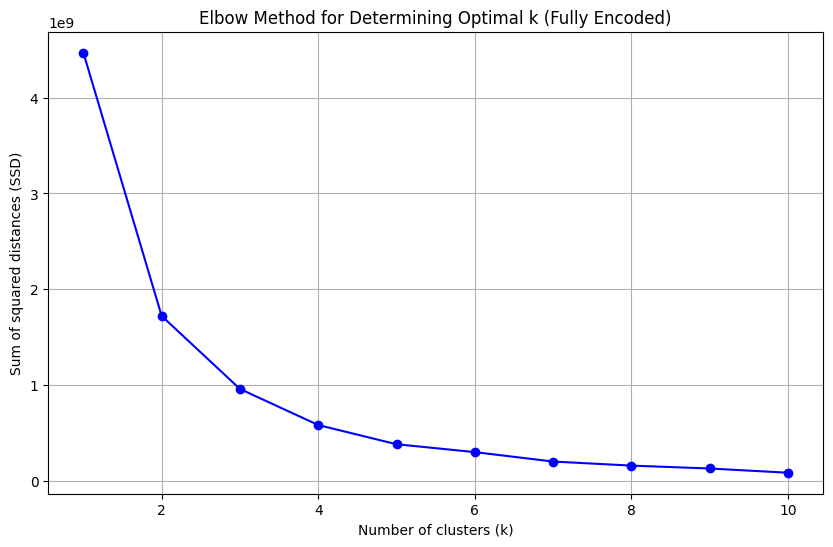

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(k_values_encoded_all, ssd_encoded_all, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method for Determining Optimal k (Fully Encoded)')
plt.grid(True)
plt.show()

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

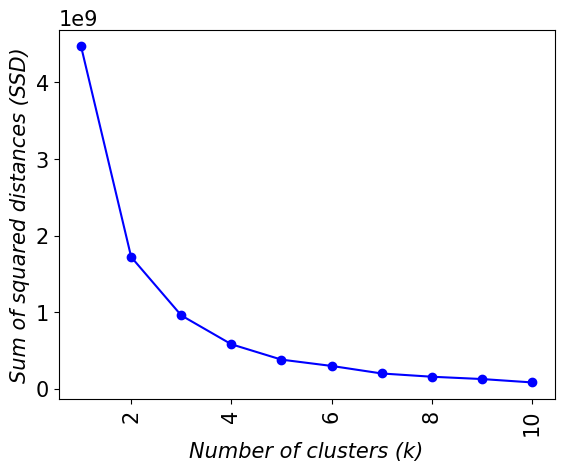

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
plt.plot(k_values_encoded_all, ssd_encoded_all, 'bo-')
#plt.title("State wise Distribution of Types of Labours")
plt.xlabel('Number of clusters (k)', fontsize = 15, style = 'italic')
plt.ylabel('Sum of squared distances (SSD)', fontsize = 15, style = 'italic')
plt.xticks(rotation=90)

#plt.savefig("fig4.pdf", bbox_inches='tight')
#files.download("fig4.pdf")

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model on the data
kmeans.fit(cluster_data)

KMeans(n_clusters=4, random_state=0)

In [15]:
cluster_data['Cluster'] = kmeans.labels_

# Calculate the average wage for each cluster
cluster_info = cluster_data.groupby('Cluster')['Wage(INR)'].mean().reset_index()
cluster_info.rename(columns={'Wage(INR)': 'Average Wage'}, inplace=True)

# Calculate the proportion of genders within each cluster
gender_counts = cluster_data.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)
gender_counts.columns = ['Male Count', 'Female Count']
gender_counts['Total Count'] = gender_counts.sum(axis=1)
gender_counts['Male Proportion'] = (gender_counts['Male Count'] / gender_counts['Total Count']) * 100
gender_counts['Female Proportion'] = (gender_counts['Female Count'] / gender_counts['Total Count']) * 100

# Combine average wage info with gender proportions
cluster_info = pd.merge(cluster_info, gender_counts, on='Cluster')

cluster_info[['Cluster', 'Average Wage', 'Male Count', 'Female Count', 'Male Proportion', 'Female Proportion', 'Total Count']]

C:\Users\admin\AppData\Local\Temp\ipykernel_17784\1664016712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = kmeans.labels_


,Cluster,Average Wage,Male Count,Female Count,Male Proportion,Female Proportion,Total Count
0,0,249.782315,89599,38348,70.028215,29.971785,127947
1,1,405.046456,50233,6946,87.852183,12.147817,57179
2,2,133.757468,51624,44558,53.673244,46.326756,96182
3,3,655.386468,6561,845,88.590332,11.409668,7406


In [16]:
labour_wage_data = df[['Labour Category', 'Wage(INR)']].dropna()

# Using K-means with k=4, a reasonable assumption based on previous analyses
kmeans_labour_wage = KMeans(n_clusters=4, random_state=0)
kmeans_labour_wage.fit(labour_wage_data)

# Add cluster labels to the data
labour_wage_data['Cluster'] = kmeans_labour_wage.labels_

# Calculate the average wage for each cluster
cluster_labour_info = labour_wage_data.groupby('Cluster')['Wage(INR)'].mean().reset_index()
cluster_labour_info.rename(columns={'Wage(INR)': 'Average Wage'}, inplace=True)

# Calculate the distribution of labour categories within each cluster
labour_category_counts = labour_wage_data.groupby(['Cluster', 'Labour Category']).size().unstack(fill_value=0)
labour_category_proportions = labour_category_counts.div(labour_category_counts.sum(axis=1), axis=0) * 100

# Combine average wage info with labour category proportions
cluster_labour_info = pd.merge(cluster_labour_info, labour_category_counts, left_on='Cluster', right_index=True)
#cluster_labour_info = pd.merge(cluster_labour_info, labour_category_proportions, left_on='Cluster', right_index=True, suffixes=('_Count', '_Proportion'))

cluster_labour_info

,Cluster,Average Wage,0,1,2,3
0,0,249.782315,66505,11983,23113,26346
1,1,405.046456,19594,2076,7785,27724
2,2,133.757468,53329,13927,19397,9529
3,3,655.386468,2378,14,1111,3903


In [17]:
state_wage_data = df[['State', 'Wage(INR)']].dropna()

# Using K-means with k=4, a reasonable assumption based on previous analyses
kmeans_state_wage = KMeans(n_clusters=4, random_state=0)
kmeans_state_wage.fit(state_wage_data)

# Add cluster labels to the data
state_wage_data['Cluster'] = kmeans_state_wage.labels_

# Calculate the average wage for each cluster
cluster_state_info = state_wage_data.groupby('Cluster')['Wage(INR)'].mean().reset_index()
cluster_state_info.rename(columns={'Wage(INR)': 'Average Wage'}, inplace=True)

# Calculate the distribution of states within each cluster
state_counts = state_wage_data.groupby(['Cluster', 'State']).size().unstack(fill_value=0)
state_proportions = state_counts.div(state_counts.sum(axis=1), axis=0) * 100

# Combine average wage info with state proportions
cluster_state_info = pd.merge(cluster_state_info, state_counts, left_on='Cluster', right_index=True)
#cluster_state_info = pd.merge(cluster_state_info, left_on='Cluster', right_index=True, suffixes=('_Count', '_Proportion'))



In [19]:
# Assuming 'le_state' is the LabelEncoder instance used for the 'State' column
sorted_cluster_info = cluster_state_info.sort_values(by='Average Wage')

# If you want it in descending order (from highest to lowest wage), you can add ascending=False
sorted_cluster_info_descending = cluster_state_info.sort_values(by='Average Wage', ascending=False)

# Display the sorted DataFrame
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(sorted_cluster_info)

   Cluster  Average Wage     0     1     2     3      4     5     6     7  \
3        3    128.139616  3297  2257  5262  9433  12245   354  3520  2747   
0        0    223.901337  3106  3885  6699  4830   8293  3012  3823  2052   
2        2    347.503463  2847  1731  3808  2849   2657  9641  4050  2673   
1        1    561.641847   243    44   399   100    583  2195   532   187   

      8     9     10    11     12    13    14    15    16    17   18     19  \
3  1585   868  12799  3011   3710  6829     0  3106  7112   508  790   2170   
0  1960  1781  10950  1013  16335   778  2426  5975  3587  2024  917  11786   
2  2543  2890   7891   211  11029    34  5955  7359  3516  2487  351   4248   
1   130  4758    888     0    651     0  1879  2869   654   336    4    629   

     20    21  
3  1508  2997  
0  1342  4484  
2  2696  1922  
1   925   154  
